In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv('/content/drive/My Drive/Datasets/Estudo/Train_SU63ISt.csv')
test = pd.read_csv('/content/drive/My Drive/Datasets/Estudo/Test_0qrQsBZ.csv')

In [0]:
train_original = train.copy()
test_original = test.copy()

In [0]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [0]:
Train = df.loc['2014-08-25':'2015-06-24']
valid = df.loc['2015-06-25':'2016-09-25']

In [0]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [0]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [0]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%d-%m-%Y %H:%M')

In [0]:
for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day']= i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [0]:
train['Day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [0]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

No handles with labels found to put in legend.


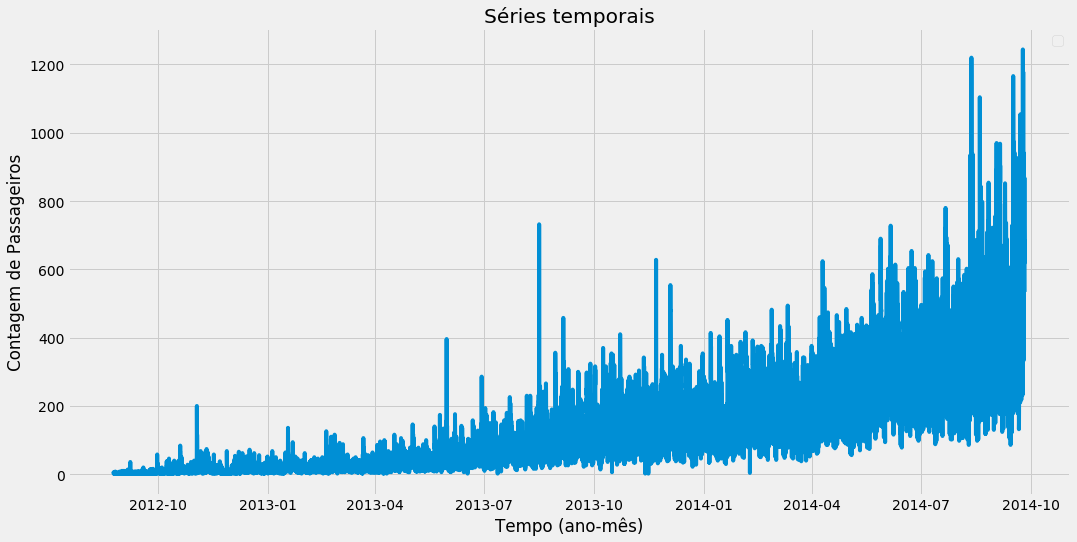

In [0]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Séries temporais")
plt.xlabel("Tempo (ano-mês)")
plt.ylabel("Contagem de Passageiros")
plt.legend(loc = 'best')

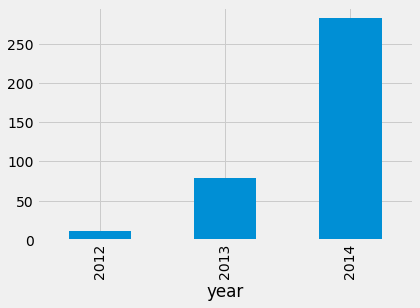

In [0]:
train.groupby('year')['Count'].mean().plot.bar()

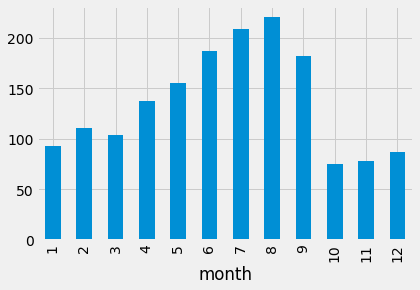

In [0]:
train.groupby('month')['Count'].mean().plot.bar()

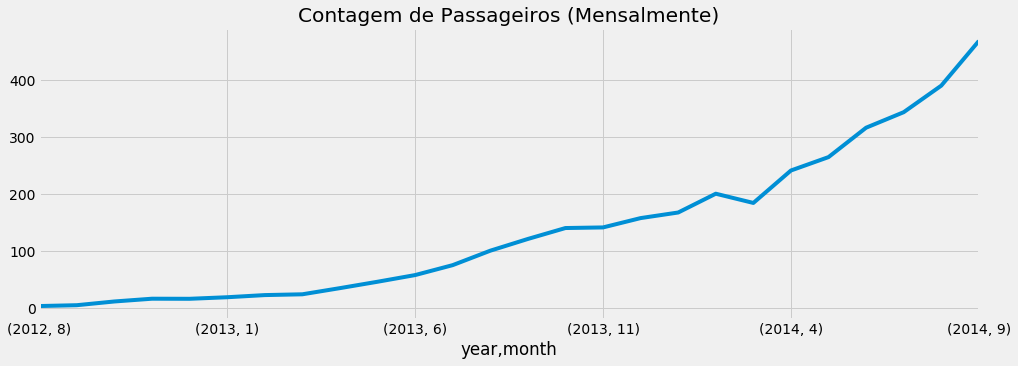

In [0]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize =(15,5), title = "Contagem de Passageiros (Mensalmente)", fontsize = 14)

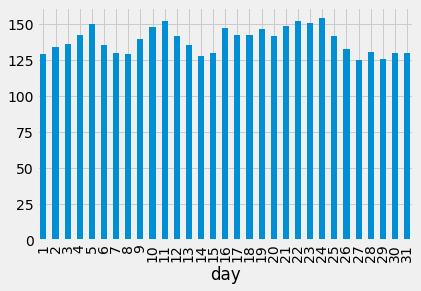

In [0]:
train.groupby('day') ['Count'].mean().plot.bar()

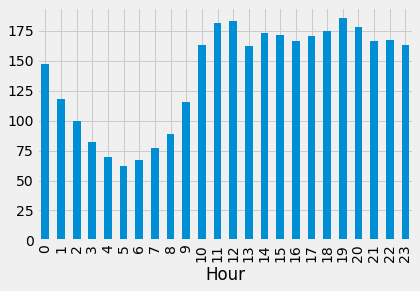

In [0]:
train.groupby('Hour')['Count'].mean().plot.bar()

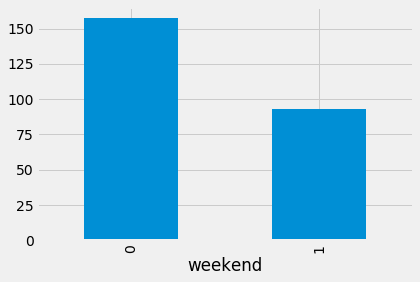

In [0]:
train.groupby('weekend') ['Count'].mean().plot.bar()

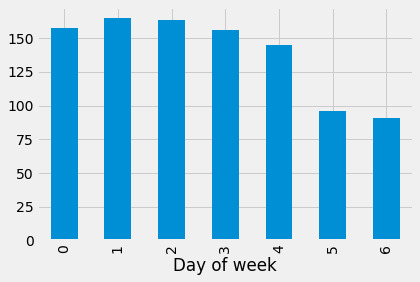

In [0]:
train.groupby('Day of week') ['Count'].mean().plot.bar()

In [0]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%y %H:%M')
train.index = train.Timestamp

#Por hora
hourly = train.resample('H').mean()

#Diariamente
daily = train.resample('D').mean()

#Semanal
weekly = train.resample('W').mean()

#Mensal
monthly = train.resample('M').mean()

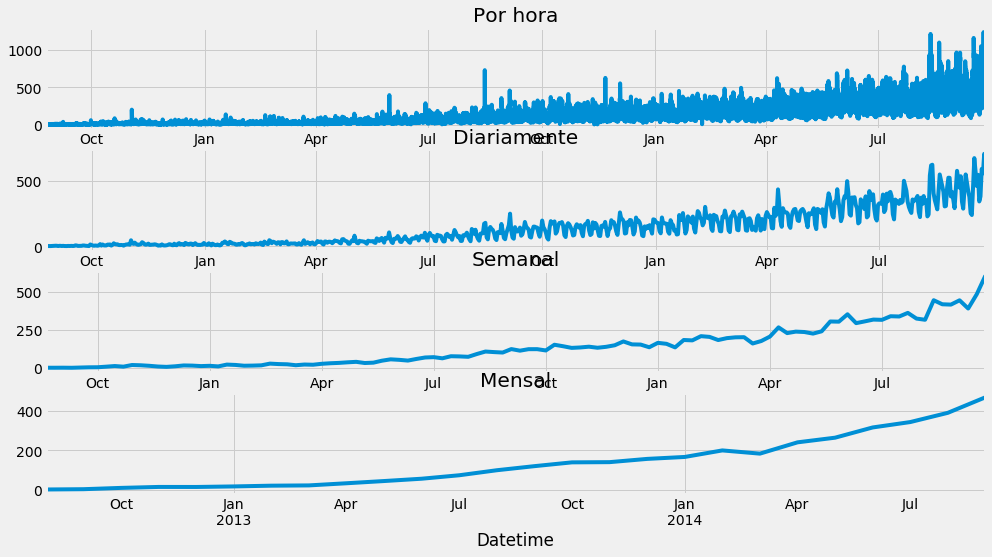

In [0]:
fig,axs = plt.subplots(4,1)

hourly.Count.plot(figsize = (15,8), title = "Por hora", fontsize = 14, ax = axs[0])
daily.Count.plot(figsize = (15,8), title = "Diariamente", fontsize = 14, ax = axs[1])
weekly.Count.plot(figsize = (15,8), title = "Semanal", fontsize = 14, ax = axs[2])
monthly.Count.plot(figsize = (15,8), title = "Mensal", fontsize = 14, ax = axs[3])

In [0]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

#Convertendo para média diária 
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

#Convertendo para média diária
train = train.resample('D').mean()

In [0]:
Train = train.ix['2012-08-25':'2014-06-24']
valid = train.ix['2014-06-25':'2014-09-25']

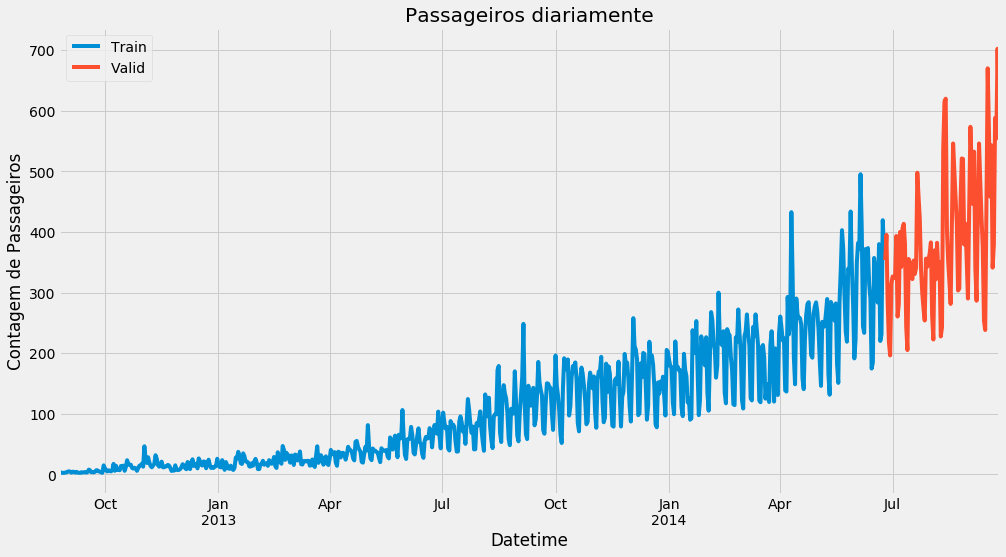

In [0]:
Train.Count.plot(figsize = (15,8), title = 'Passageiros diariamente', fontsize = 14, label = 'Train')
valid.Count.plot(figsize = (15,8), title = 'Passageiros diariamente', fontsize =14, label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('Contagem de Passageiros')
plt.legend(loc = 'best')

Text(0.5, 1.0, 'Naive Forecast')

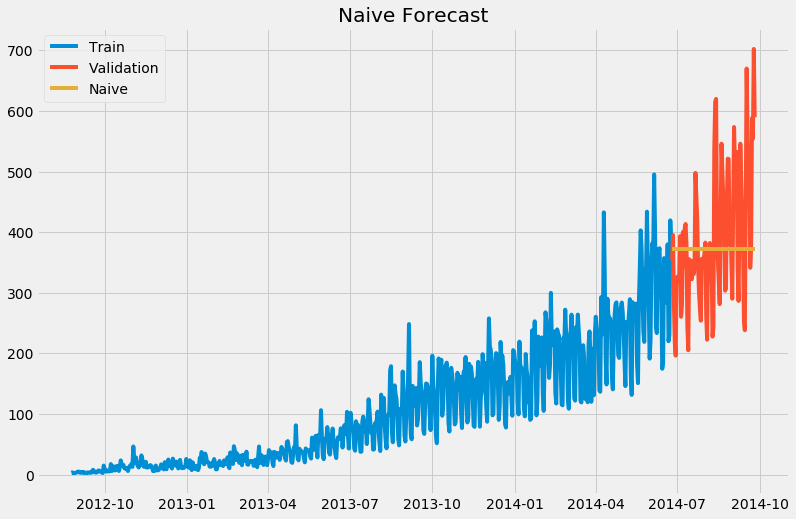

In [0]:
dd = np.asarray(Train.Count)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Count'],label = 'Train')
plt.plot(valid.index, valid['Count'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Count, y_hat.naive))
rmse

111.79050467496724

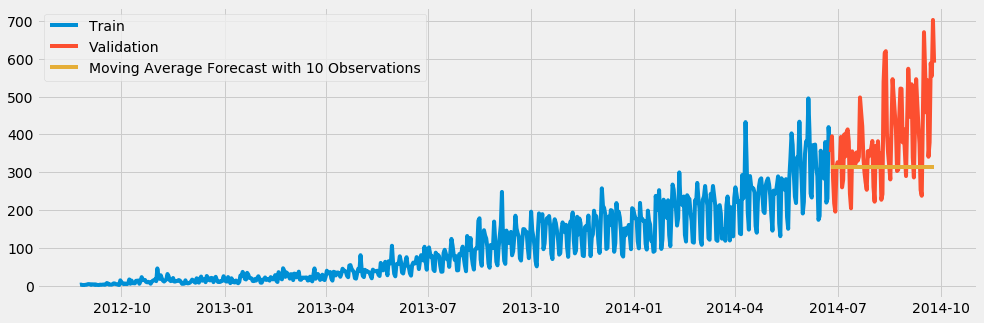

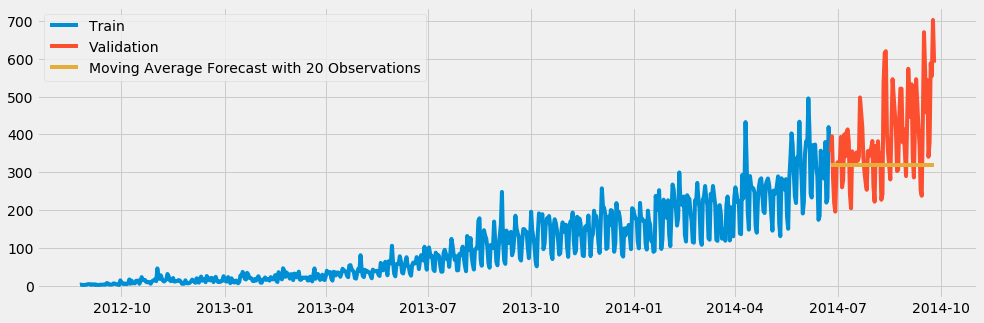

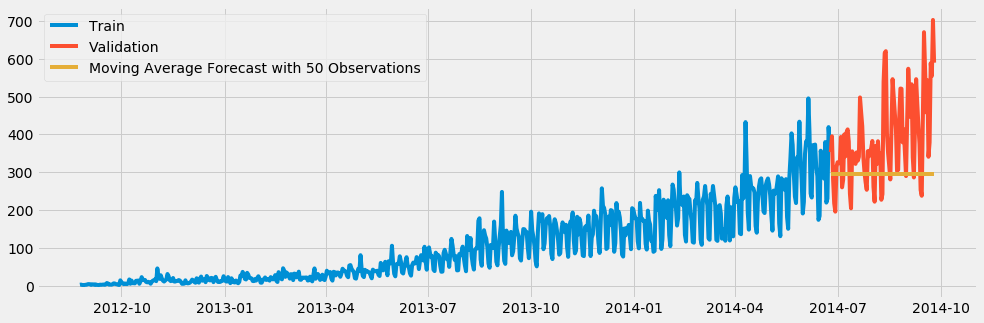

In [0]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

In [0]:
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['moving_average_forecast']))
rmse

144.19175679986802

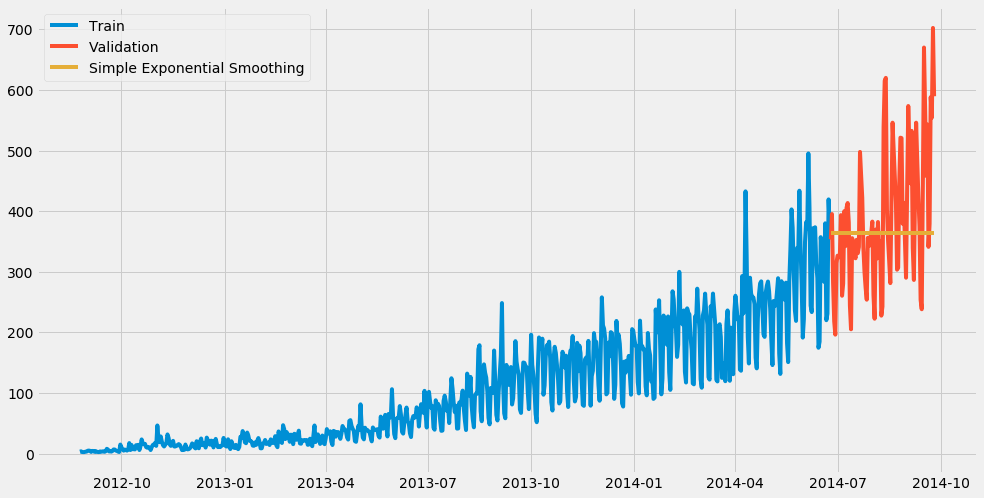

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level = 0.6,optimized = False)
y_hat['SES'] = fit2.forecast(len(valid))
plt.figure(figsize =(15,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')

In [0]:
rmse = sqrt(mean_squared_error(valid.Count, y_hat['SES']))
rmse

113.43708111884514

<Figure size 1600x800 with 0 Axes>

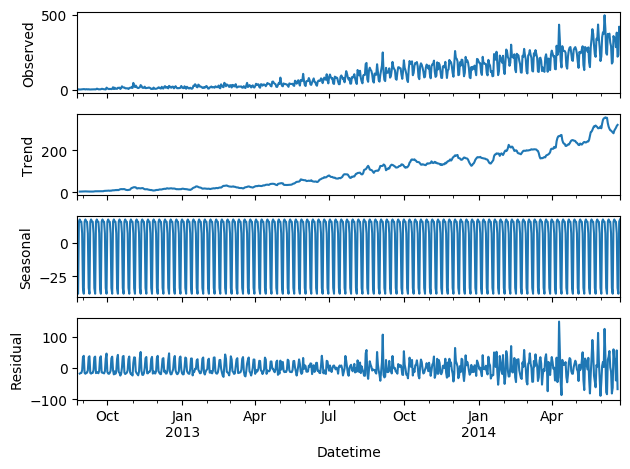

In [0]:
plt.style.use('default')
plt.figure(figsize = (16,8))
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

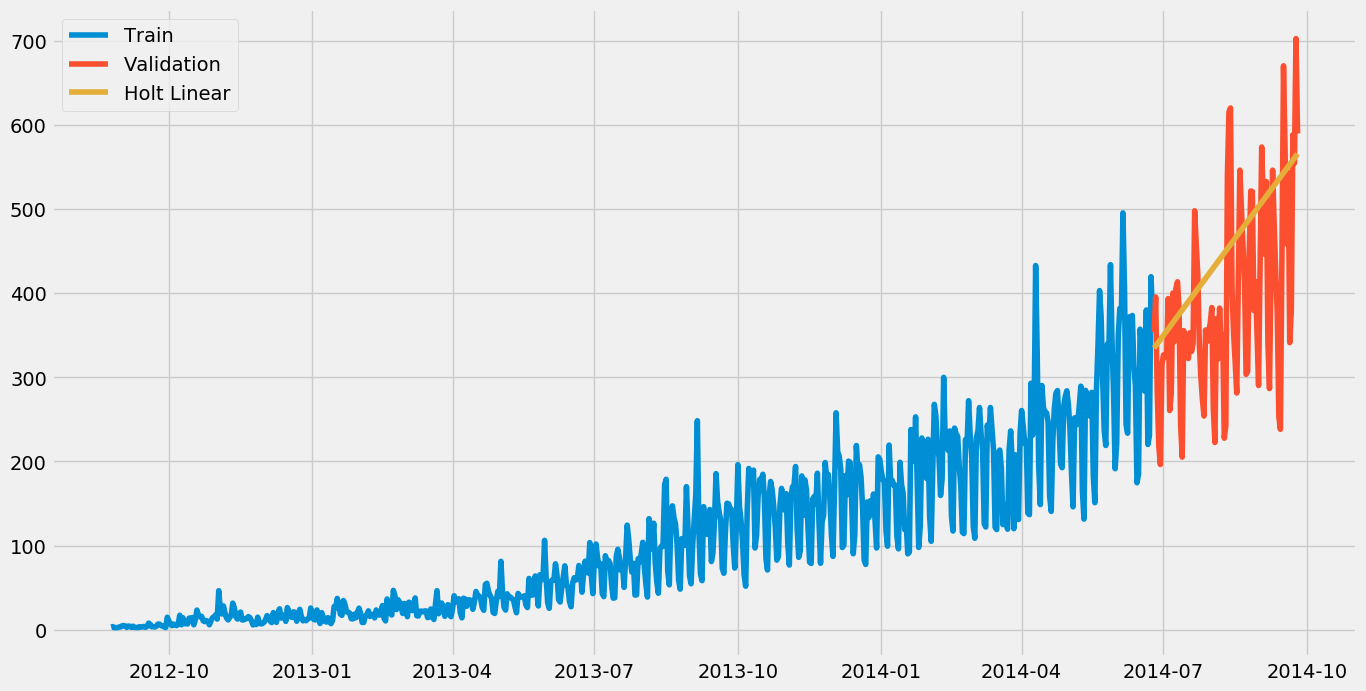

In [0]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.plot(Train.Count, label = 'Train')
plt.plot(valid.Count, label = 'Validation')
plt.plot(y_hat_holt['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')

In [0]:
rmse = sqrt(mean_squared_error(valid.Count, y_hat_holt.Holt_linear))
rmse

112.94278345314041

In [0]:
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [0]:
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

temp = train_original.groupby(['Hour']) ['ratio'].sum()

pd.DataFrame(temp, columns= ['Hour', 'ratio']).to_csv('Groupby.csv')
temp2 = pd.read_csv("Groupby.csv")
temp2 =temp2.drop('Hour.1',1)

merge = pd.merge(test, test_original, on = ('day', 'month','year'), how = 'left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year','month','day','Hour_x','Datetime','Hour_y'], axis =1)

prediction = pd.merge(merge, temp2, on = 'Hour',how = 'left')

prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24
prediction['ID'] = prediction['ID_y']
prediction.head()

,ID_x,prediction,ID_y,Hour,ratio,Count,ID
0,18299.5,334.650767,18288,0,0.044287,355.692974,18288
1,18299.5,334.650767,18289,1,0.035343,283.861602,18289
2,18299.5,334.650767,18290,2,0.029911,240.234347,18290
3,18299.5,334.650767,18291,3,0.024714,198.497058,18291
4,18299.5,334.650767,18292,4,0.020802,167.075574,18292


In [0]:
submission = prediction.drop(['ID_x','ID_y','prediction','Hour','ratio'], axis =1)
pd.DataFrame(submission, columns = ['ID','Count']).to_csv('Holt_Linear.csv')

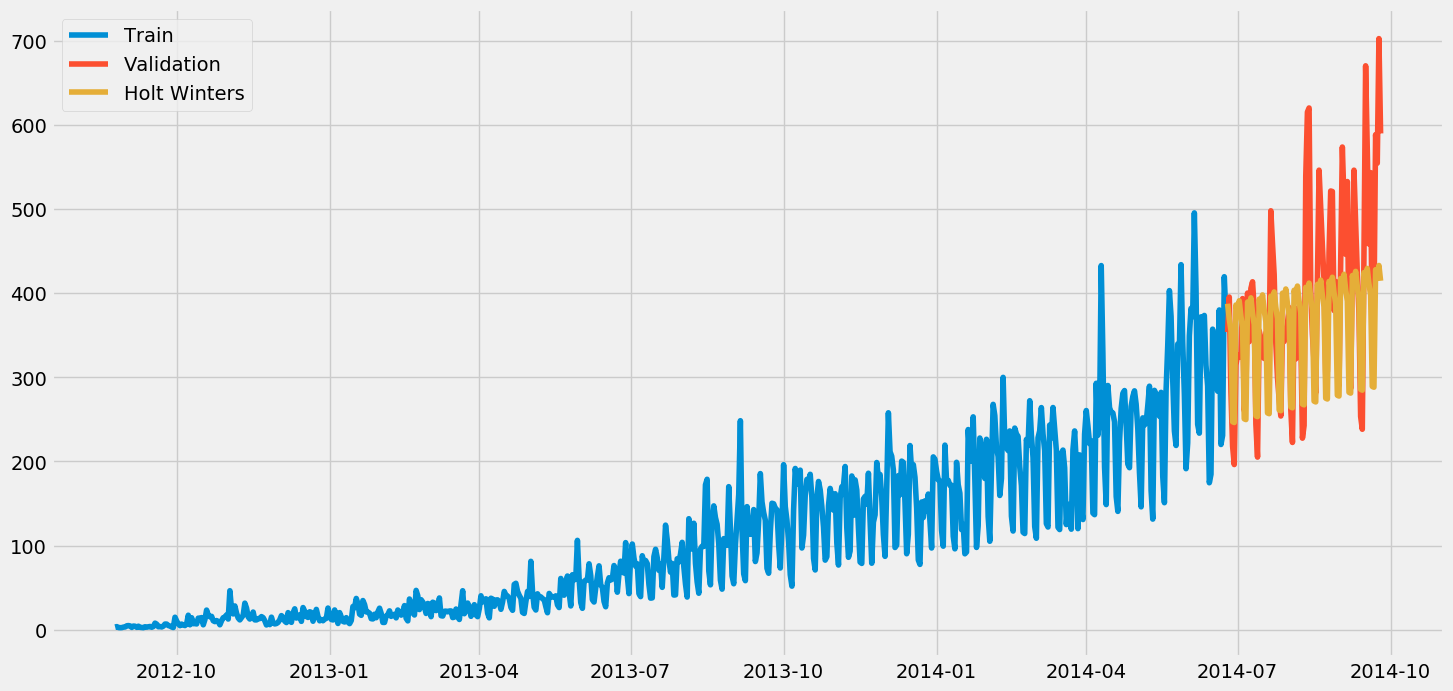

In [0]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods= 7, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')

In [0]:
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['Holt_Winter']))
rmse

82.37571191747172

In [0]:
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [0]:
merge = pd.merge(test, test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour']= merge['Hour_y']
merge.head()
merge = merge.drop(['year', 'month', 'Datetime','Hour_x', 'Hour_y'], axis =1)

prediction = pd.merge(merge, temp2 , on = 'Hour', how = 'left')

prediction['Count'] = prediction['prediction'] * prediction['ratio'] *24
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio,Count
0,18299.5,26.0,387.359995,18288,0,0.044287,411.716459
1,18299.5,26.0,387.359995,18289,1,0.035343,328.571274
2,18299.5,26.0,387.359995,18290,2,0.029911,278.072500
3,18299.5,26.0,387.359995,18291,3,0.024714,229.761373
4,18299.5,26.0,387.359995,18292,4,0.020802,193.390842
